In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train/ 255
x_test = x_test/ 255

In [4]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

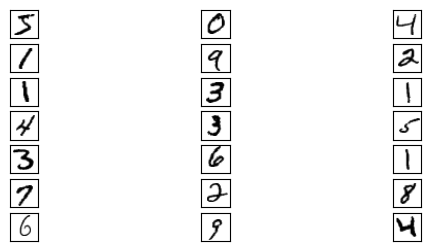

In [5]:
plt.figure(figsize=(7,3))
for i in range(21):
    plt.subplot (7,3, i+1) 
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [6]:
model = keras.Sequential([
    Flatten(input_shape= (28,28,1)), 
    Dense(128, activation='relu'), 
    Dense(10, activation = 'softmax')
])
print(model.summary())

/Users/apple/python/myDevs/TemplatesForDevs/NUmberRecognitions/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])


In [8]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.8610 - loss: 0.4837 - val_accuracy: 0.9579 - val_loss: 0.1502
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.9591 - loss: 0.1382 - val_accuracy: 0.9647 - val_loss: 0.1162
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - accuracy: 0.9741 - loss: 0.0877 - val_accuracy: 0.9710 - val_loss: 0.0979
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.9813 - loss: 0.0634 - val_accuracy: 0.9721 - val_loss: 0.0929
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.9865 - loss: 0.0467 - val_accuracy: 0.9740 - val_loss: 0.0864


In [9]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.9742 - loss: 0.0918


[0.08066672086715698, 0.9760000109672546]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[1.0775129e-07 2.7865087e-06 2.3801960e-05 1.0128937e-03 1.2233634e-03
  8.8006045e-06 1.0426426e-09 6.5276137e-05 8.6357659e-07 9.9766219e-01]]
Распознанная цифра: 9


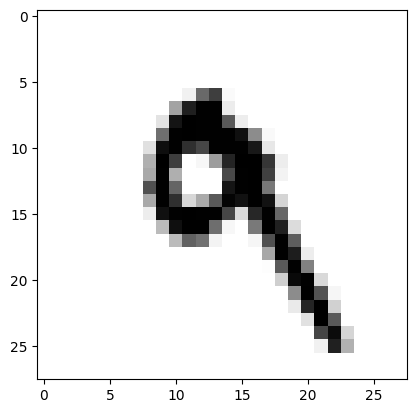

In [18]:
n = 7


x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f"Распознанная цифра: {np.argmax(res)}")
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [ ]:
model.save()

In [12]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(pred.shape)
print(pred[:20])

print(y_test[:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [13]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(240, 28, 28)


Значение сети: 6


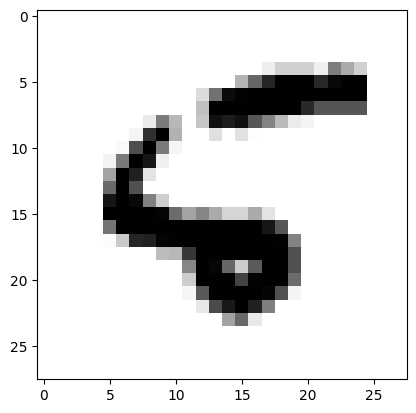

Значение сети: 9


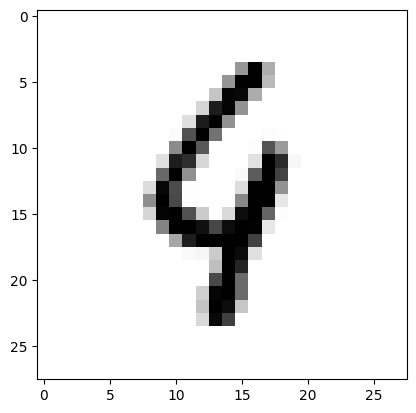

Значение сети: 2


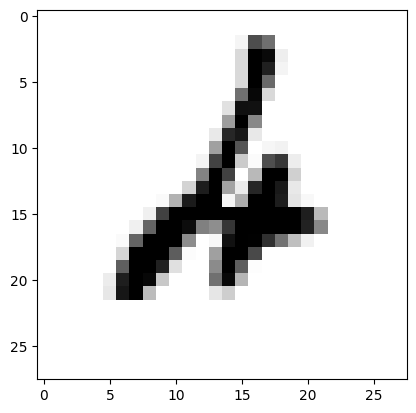

Значение сети: 0


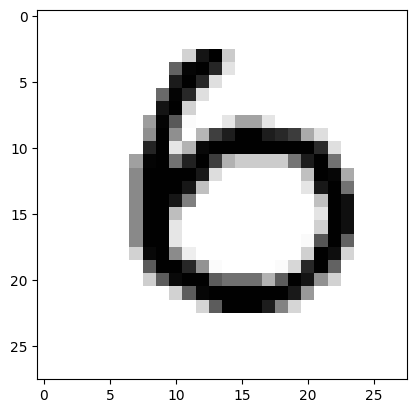

Значение сети: 7


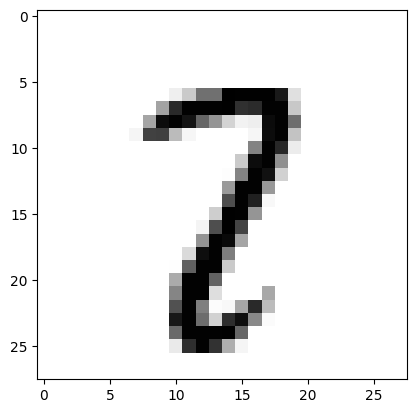

In [14]:
for i in range(5):
    print("Значение сети: "+str(p_false[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()